# Imports

In [1]:
from matplotlib import image as mpimg
import numpy as np
import matplotlib.pyplot as plt

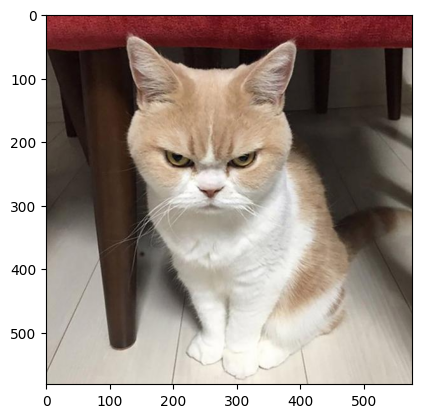

In [2]:
image_source = mpimg.imread("Data/cat.jpg")
plt.imshow(image_source)
plt.show()

In [5]:
image = np.copy(image_source)

In [13]:
image_gray = image[:,:,0]

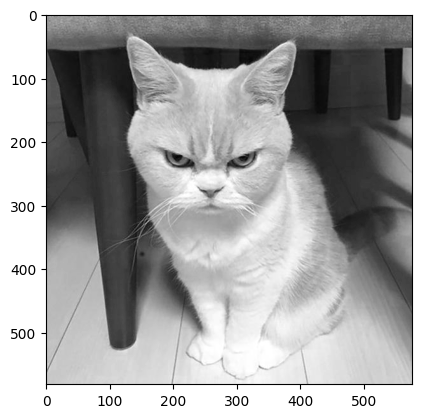

In [15]:
plt.imshow(image_gray, cmap="gray")
plt.show()

# Problem 4

## Median Filter

In [146]:
#For simplicity, let B be a centered square with r total blocks. Note, r has to be odd.
def median_filtering(image: np.array, r):
    if r%2!=1: raise Exception(f"r={r} which is not an odd number")
    
    #Initialization
    rows,cols =  image.shape
    vals = np.zeros((r,r))
    d = (r-1)//2
    
    new_img = np.zeros(image.shape)
    for i in range(rows):
        for j in range(cols):
            
            for k in range (-d,d+1):
                for l in range(-d,d+1):
                    if i+k<0 or i+k>=rows or j+l<0 or j+l>=cols:
                        vals[k+d,l+d]=0
                    else:
                        vals[k+d,l+d] = image[i+k,j+l]
                        
            new_img[i,j] = np.median(vals)
            
    return new_img

## Other filter

In [74]:
#For simplicity, let B be a centered square with r total blocks. Note, r has to be odd.
def mean_filtering(image: np.array, r):
    if r%2!=1: raise Exception(f"r={r} which is not an odd number")
    
    #Initialization
    rows,cols =  image.shape
    vals = np.zeros((r,r))
    d = (r-1)//2
    
    new_img = np.zeros(image.shape)
    for i in range(rows):
        for j in range(cols):
            
            for k in range (-d,d+1):
                for l in range(-d,d+1):
                    if i+k<0 or i+k>=rows or j+l<0 or j+l>=cols:
                        vals[k+d,l+d]=0
                    else:
                        vals[k+d,l+d] = image[i+k,j+l]
                        
            new_img[i,j] = np.mean(vals)
            
    return new_img

## Adding noise to picture

In [110]:
image_noisy = image_gray/255 + 10*np.random.binomial(1,0.025,size=image_gray.shape) \
                             - 10*np.random.binomial(1,0.025,size=image_gray.shape)
image_noisy[image_noisy<0]=0
image_noisy[image_noisy>1]=1

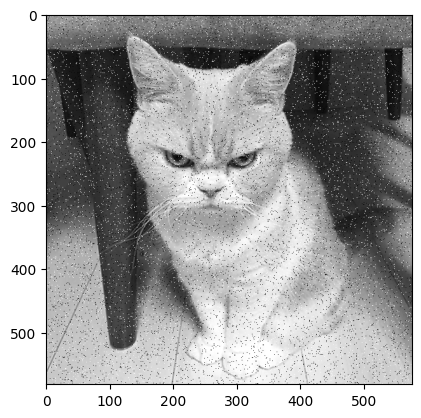

In [112]:
plt.imshow(image_noisy, cmap="gray")
plt.show()

In [113]:
%%time
img_median_1 = median_filtering(image_gray,1)

CPU times: total: 9.77 s
Wall time: 14.1 s


In [114]:
%%time
img_median_3 = median_filtering(image_noisy, 3)

CPU times: total: 13.5 s
Wall time: 16.7 s


In [115]:
%%time
img_median_5 = median_filtering(image_noisy, 5)

CPU times: total: 15.3 s
Wall time: 21.8 s


In [116]:
%%time
img_median_7 = median_filtering(image_noisy, 7)

CPU times: total: 21.5 s
Wall time: 26.7 s


In [117]:
%%time
img_mean_3 = mean_filtering(image_noisy, 3)

CPU times: total: 3.48 s
Wall time: 7.85 s


In [118]:
%%time
img_mean_5 = mean_filtering(image_noisy, 5)

CPU times: total: 7.41 s
Wall time: 15.5 s


In [119]:
%%time
img_mean_7 = mean_filtering(image_noisy, 7)

CPU times: total: 11.6 s
Wall time: 22.8 s


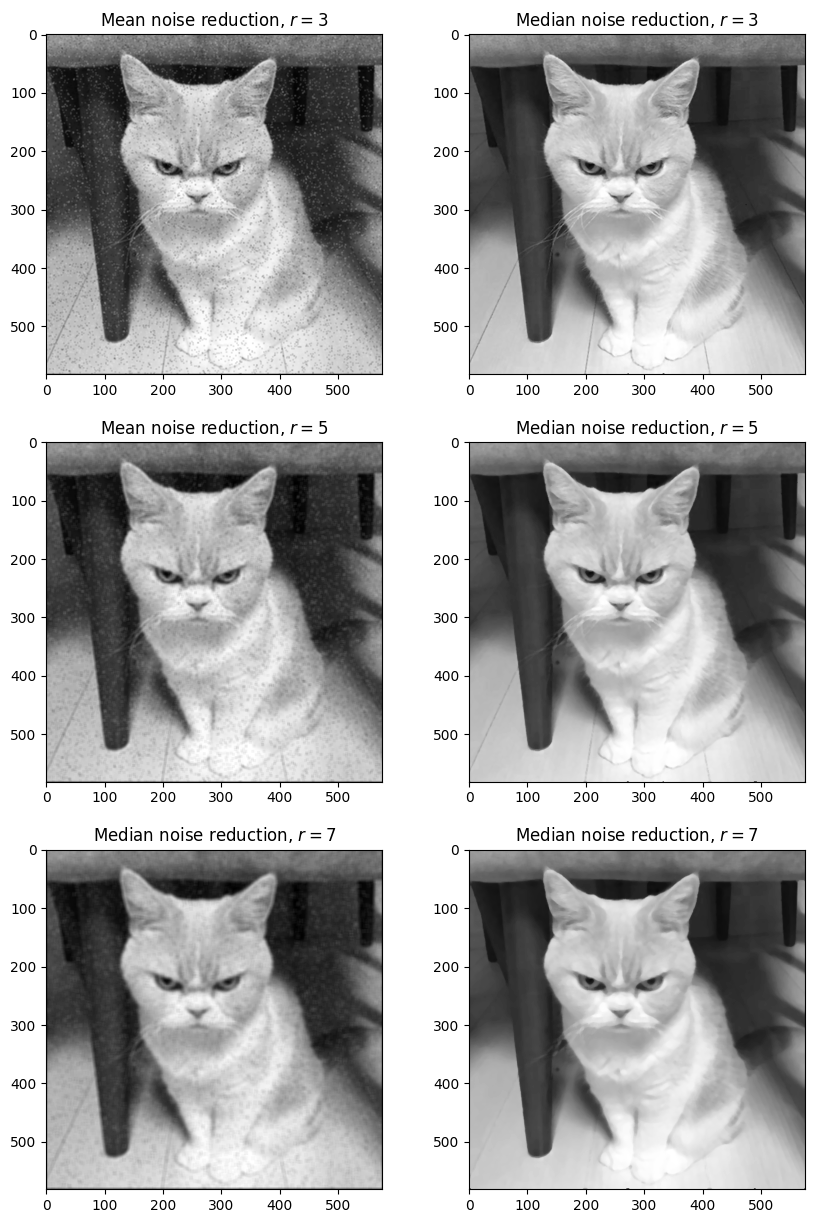

In [120]:
fig,axs = plt.subplots(3,2,figsize=(10,15))


axs[0,0].imshow(img_mean_3,cmap="gray")
axs[0,0].set_title("Mean noise reduction, $r=3$")

axs[1,0].imshow(img_mean_5,cmap="gray")
axs[1,0].set_title("Mean noise reduction, $r=5$")

axs[2,0].imshow(img_mean_7,cmap="gray")
axs[2,0].set_title("Median noise reduction, $r=7$")

axs[0,1].imshow(img_median_3,cmap="gray")
axs[0,1].set_title("Median noise reduction, $r=3$")

axs[1,1].imshow(img_median_5,cmap="gray")
axs[1,1].set_title("Median noise reduction, $r=5$")

axs[2,1].imshow(img_median_7,cmap="gray")
axs[2,1].set_title("Median noise reduction, $r=7$")

plt.show()


# Problem 5 

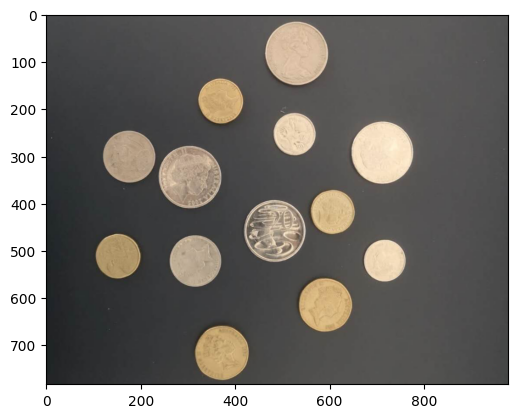

In [123]:
image_coins_source = mpimg.imread("Data/coins.png")
plt.imshow(image_coins_source)
plt.show()

In [151]:
def dilation(image, r):
    if r%2!=1: raise Exception(f"r={r} which is not an odd number")
    
    #Initialization
    rows,cols =  image.shape
    vals = np.zeros((r,r))
    d = (r-1)//2
    
    new_img = np.zeros(image.shape)
    for i in range(rows):
        for j in range(cols):
            
            for k in range (-d,d+1):
                for l in range(-d,d+1):
                    if i+k<0 or i+k>=rows or j+l<0 or j+l>=cols:
                        vals[k+d,l+d]=0
                    else:
                        vals[k+d,l+d] = image[i+k,j+l]
                        
            new_img[i,j] = np.max(vals)
            
    return new_img

In [152]:
def erosion(image, r):
    if r%2!=1: raise Exception(f"r={r} which is not an odd number")
    
    #Initialization
    rows,cols =  image.shape
    vals = np.zeros((r,r))
    d = (r-1)//2
    
    new_img = np.zeros(image.shape)
    for i in range(rows):
        for j in range(cols):
            
            for k in range (-d,d+1):
                for l in range(-d,d+1):
                    if i+k<0 or i+k>=rows or j+l<0 or j+l>=cols:
                        vals[k+d,l+d]=10
                    else:
                        vals[k+d,l+d] = image[i+k,j+l]
                        
            new_img[i,j] = np.min(vals)
            
    return new_img

In [168]:
def hit_or_miss(image, r1, r2):
    """
    r1 is the radius of the inner ring. B
    r2 is the radius of the outer ring. C = outer ring\inner ring
    
    But remember, everything are squares actually:)
    """
    if r1%2!=1 or r2%2!=1: raise Exception(f"r1={r1} or r2={r2} is not an odd number")
    
    #Initialization
    rows,cols =  image.shape
    vals_B = np.zeros((r1,r1))
    vals_C = np.zeros((r2,r2))
    d1 = (r1-1)//2
    d2 = (r2-1)//2
    d_diff = d2-d1
    
    image_comp = np.abs(np.copy(img)-1)
    new_img = np.zeros(image.shape)
    for i in range(rows):
        if i%100==0: print(f"Reached row number {i}")
        for j in range(cols):
            
            
            for k1 in range (-d1,d1+1):
                for l1 in range(-d1,d1+1):
                    if i+k1<0 or i+k1>=rows or j+l1<0 or j+l1>=cols:
                        vals_B[k1+d1,l1+d1]=10
                    else:
                        vals_B[k1+d1,l1+d1] = image[i+k1,j+l1]
            
            u_erosion_B = np.min(vals_B)
            
            for k2 in range (-d2,d2+1):
                for l2 in range(-d2,d2+1):
                    if i+k2<0 or i+k2>=rows or j+l2<0 or j+l2>=cols:
                        vals_C[k2+d1,l2+d2]=10
                    else:
                        vals_C[k2+d2,l2+d2] = image_comp[i+k2,j+l2]
            
            #vals_C shouldn't have values in the middle. So set them to 10
            vals_C[d_diff:-d_diff, d_diff:-d_diff]
            
            u_erosion_C = np.min(vals_C)
            
            new_img[i,j] = min(u_erosion_B, u_erosion_C)
            
    return new_img
    

In [141]:
img = np.copy(image_coins_source[:,:,0])

In [142]:
np.max(img)

1.0

In [143]:
img[img>0.5]=1
img[img<=0.5]=0

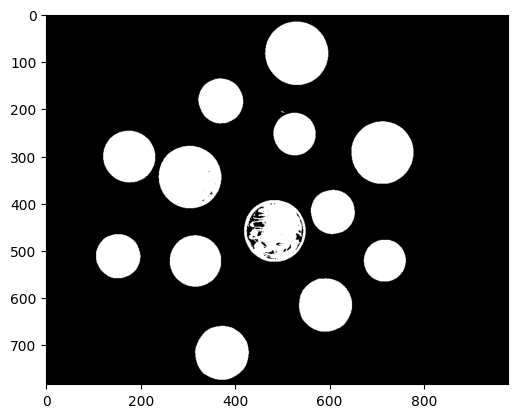

In [144]:
plt.imshow(img, cmap="gray")
plt.show()

In [153]:
%%time
img3 = dilation(img, 5)

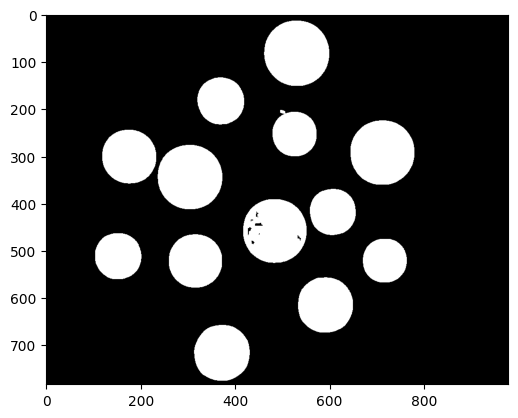

In [154]:
plt.imshow(img3, cmap="gray")
plt.show()

In [169]:
%%time
img4 = hit_or_miss(img3, 41,51)

Reached row number 0
Reached row number 100
Reached row number 200


KeyboardInterrupt: 

In [170]:
plt.imshow(img4, cmap="gray")
plt.show()

NameError: name 'img4' is not defined

In [149]:
%%time
img2 = median_filtering(img, 7)

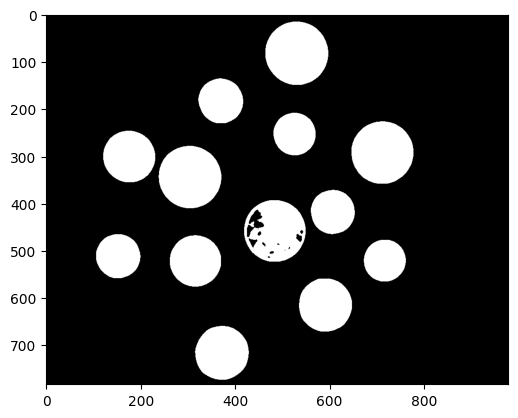

In [150]:
plt.imshow(img2, cmap="gray")
plt.show()